In [20]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error

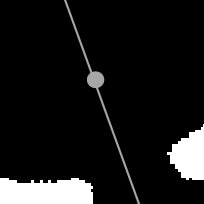

In [21]:
img = cv2.imread('/content/image.jpg')
cv2_imshow(img)

In [22]:
# zmniejszanie przy pomocy jadra konwolucji
def resize_image_decrease(image, scale_factor):
    kernel = np.ones((scale_factor, scale_factor), np.float32) / (scale_factor ** 2)
    dcr_img = cv2.filter2D(image, -1, kernel)
    return dcr_img[::scale_factor, ::scale_factor]

scale_factor = 2
smaller_img = resize_image_decrease(img, scale_factor)

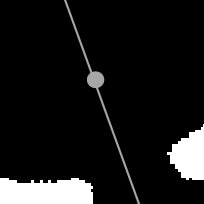

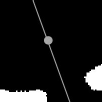

In [23]:
cv2_imshow(img)
cv2_imshow(smaller_img)

In [24]:
def resize_image_increase(image, scale_factor):
    height, width = image.shape[:2]

    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # tworzymy nowy pusty obraz z wyskalowanymi parametrami
    enlarged_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            # współrzędne w oryginalnym obrazie, przekształcone przy użyciu skali
            original_i = int(i / scale_factor)
            original_j = int(j / scale_factor)

            # interpolacja punktów
            enlarged_image[i, j] = image[original_i, original_j]

    return enlarged_image

img = cv2.imread('/content/image.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Error loading image.")

# Skalowanie obrazu o współczynnik 2 (powiększenie dwukrotne)
scale_factor = 2
larger_img = resize_image_increase(img, scale_factor)

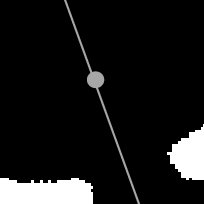

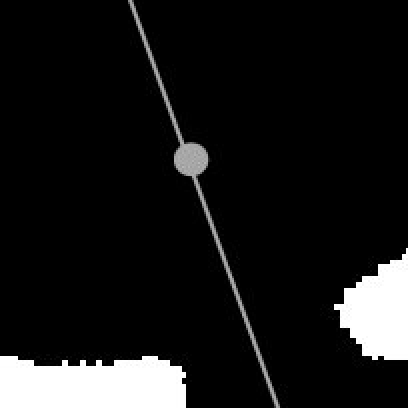

In [25]:
cv2_imshow(img)
cv2_imshow(larger_img)

In [26]:
def mse(image1, image2):
    # Dopasowanie rozmiarów obrazów
    min_height = min(image1.shape[0], image2.shape[0])
    min_width = min(image1.shape[1], image2.shape[1])
    image1 = image1[:min_height, :min_width]
    image2 = image2[:min_height, :min_width]

    return np.sum((image1 - image2)**2) / float(image1.size)

In [27]:
mse_up = mse(img, larger_img) # mse dla mniejszego obrazu obliczono ustawiając scale factor dla funkcji powiększającej jako 1/2
print(mse_up)

9.892325067281815
